In [67]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
%matplotlib inline

# Tesla, Microsoft and Saleforce GoogleFinance files for My Portfolio
tsla_data = Path("tsla_historical.csv")
msft_data = Path("msft_historical.csv")
crm_data = Path("crm_historical.csv")

algo_data = Path("algo_returns.csv")
sp500_data = Path("sp500_history.csv")
whale_data = Path("whale_returns.csv")

# Read the individual CSV datasets including My Portfolio companies
tsla = pd.read_csv(tsla_data, index_col="Date",infer_datetime_format=True, parse_dates=True)
algo = pd.read_csv(algo_data, index_col="Date",infer_datetime_format=True, parse_dates=True)
msft = pd.read_csv(msft_data, index_col="Date",infer_datetime_format=True, parse_dates=True)
crm = pd.read_csv(crm_data, index_col="Date",infer_datetime_format=True, parse_dates=True)
sp500 = pd.read_csv(sp500_data, index_col="Date",infer_datetime_format=True, parse_dates=True)
whale = pd.read_csv(whale_data, index_col="Date",infer_datetime_format=True, parse_dates=True)

In [68]:
# Cleaning nulls from DataFrames by dropping nulls
whale = whale.dropna().copy()
algo = algo.dropna().copy()
sp500 = sp500.dropna().copy()
sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [69]:
# Clean identified numeric fields with $ symbol
sp500["Close"] = sp500["Close"].str.replace("$","")
# Convert `Close`to `float`
sp500["Close"] = sp500["Close"].astype("float")
# Calculate the daily return using the 'pct_change()' function
sp500_dailyreturns = sp500.pct_change()

#My portfolio stocks dailyreturns and Null clean up
tsla_dailyreturns = tsla.pct_change()
msft_dailyreturns = msft.pct_change()
crm_dailyreturns = crm.pct_change()
tsla_dailyreturns = tsla_dailyreturns.dropna().copy()
msft_dailyreturns = msft_dailyreturns.dropna().copy()
crm_dailyreturns = crm_dailyreturns.dropna().copy()

#Create My portfolio pivot table
my_portfolio = pd.concat([tsla_dailyreturns, msft_dailyreturns, crm_dailyreturns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
my_portfolio.sort_index(inplace=True)

# Set column names 
my_portfolio.columns = ["TSLA", "MSFT", "CRM"]

# Display a few rows
my_portfolio.head()

C:\Users\lanz9\AppData\Local\Temp\ipykernel_8156\1752896582.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500["Close"] = sp500["Close"].str.replace("$","")


,TSLA,MSFT,CRM
Date,,,
2014-01-03 16:00:00,-0.003996,-0.006728,0.004739
2014-01-06 16:00:00,-0.017051,-0.021132,-0.016147
2014-01-07 16:00:00,0.016327,0.007750,0.013277
2014-01-08 16:00:00,0.013052,-0.017852,0.036215
2014-01-09 16:00:00,-0.024777,-0.006432,-0.011416


In [70]:
# Calculate Portfolio Returns with an equal amount of each stock
tsla_weight = 100/3
msft_weight = 100/3
crm_weight = 100/3

portfolio_returns = tsla_weight * my_portfolio["TSLA"] + msft_weight * my_portfolio["MSFT"] + crm_weight * my_portfolio["CRM"]

portfolio_returns.index=portfolio_returns.index.date
portfolio_returns.head()

2014-01-03   -0.199478
2014-01-06   -1.811008
2014-01-07    1.245104
2014-01-08    1.047157
2014-01-09   -1.420810
dtype: float64

In [71]:
#Remove nulls from my_portfolio returns
portfolio_returns = portfolio_returns.dropna().copy()

In [72]:
#Drops nulls from SP500
sp500_dailyreturns = sp500_dailyreturns.dropna().copy()

# Create a new pivot table where the columns are daily returns for each ticker including My Portfolio
combined_df = pd.concat([whale, algo, sp500_dailyreturns, portfolio_returns], axis="columns", join="outer")
combined_df=combined_df.dropna()
# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names 
combined_df.columns = ["SOROS", "Paulson", "Tiger", "BH", "Algo 1", "Algo 2", "S&P 500", "My Portfolio"]

# Display a few rows
combined_df.head()

C:\Users\lanz9\AppData\Local\Temp\ipykernel_8156\690908654.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  combined_df = pd.concat([whale, algo, sp500_dailyreturns, portfolio_returns], axis="columns", join="outer")


,SOROS,Paulson,Tiger,BH,Algo 1,Algo 2,S&P 500,My Portfolio
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.836401
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.698806
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.107185
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-2.224442
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.344997


In [73]:
combined_df.tail()

,SOROS,Paulson,Tiger,BH,Algo 1,Algo 2,S&P 500,My Portfolio
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.269104
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.494758
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.683800
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.835575
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,-0.583352


<Axes: title={'center': 'Daily Plot of All Portfolios'}>

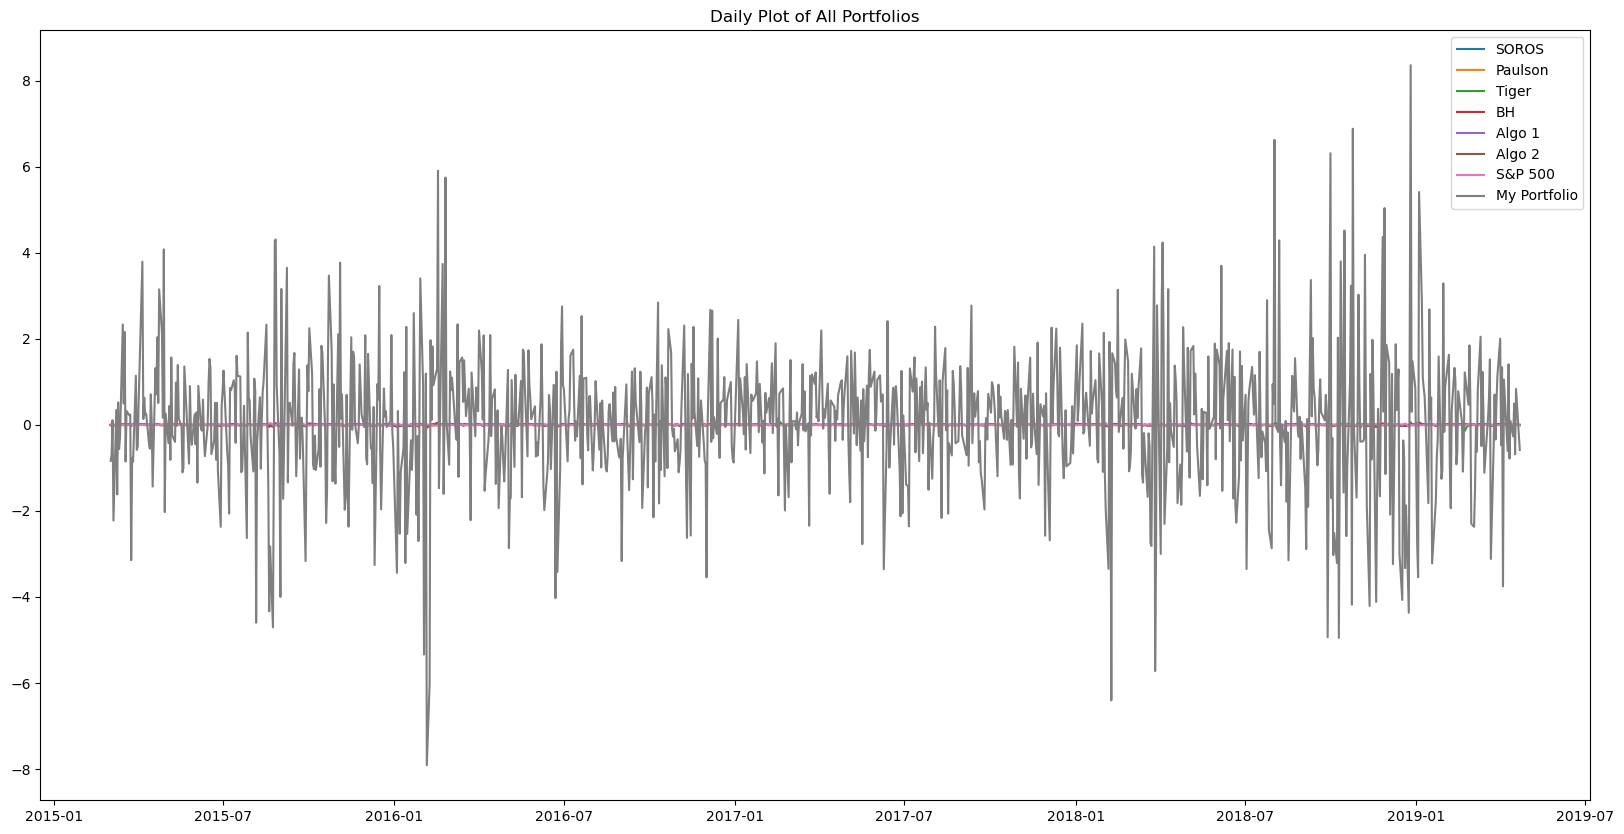

In [74]:
#Plot All portfolio returns
combined_df.plot(figsize=(20, 10), title='Daily Plot of All Portfolios')

In [75]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
weights = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.16]
portfolio_returns = combined_df.dot(weights)
portfolio_returns.head()

2015-03-03   -0.135239
2015-03-04   -0.111835
2015-03-05    0.021340
2015-03-06   -0.362319
2015-03-09    0.057853
dtype: float64

In [76]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

2015-03-03    0.864761
2015-03-04    0.768050
2015-03-05    0.784440
2015-03-06    0.500222
2015-03-09    0.529162
dtype: float64

<Axes: >

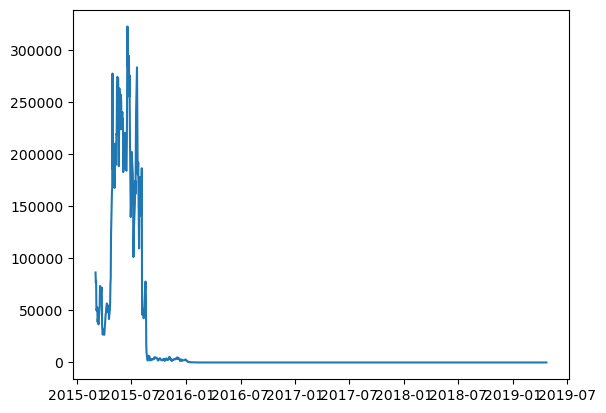

In [77]:
# Plot the returns of the portfolio in terms of money
initial_investment = 100000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

<Axes: title={'center': 'My Portfolio Returns'}>

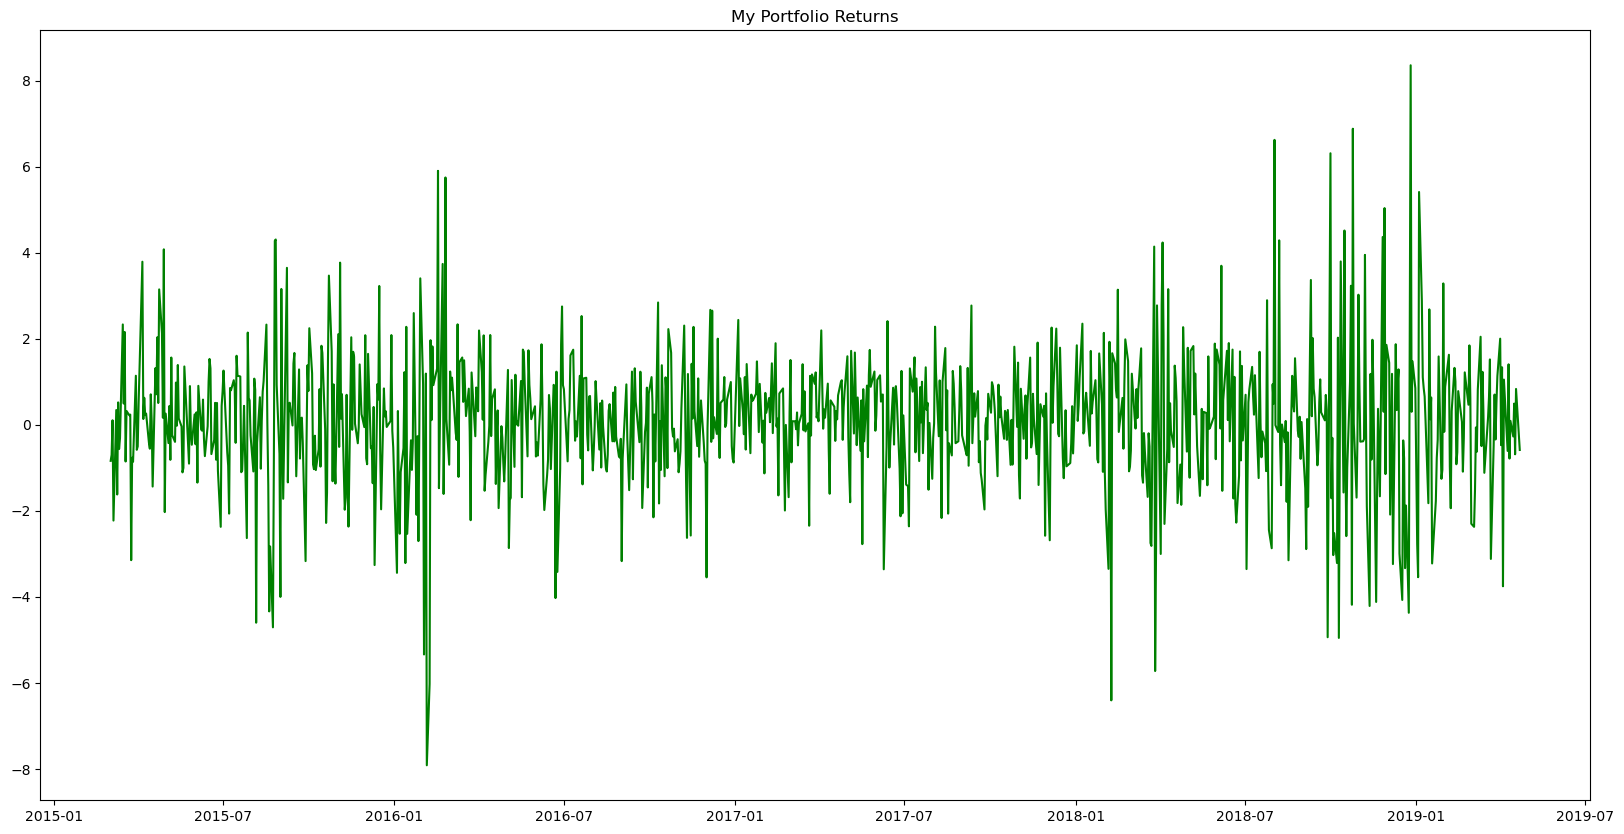

In [78]:
#Plot my portfolio
combined_df['My Portfolio'].plot(color='green', figsize=(20, 10), title='My Portfolio Returns')

<Axes: title={'center': 'SP500 Returns'}>

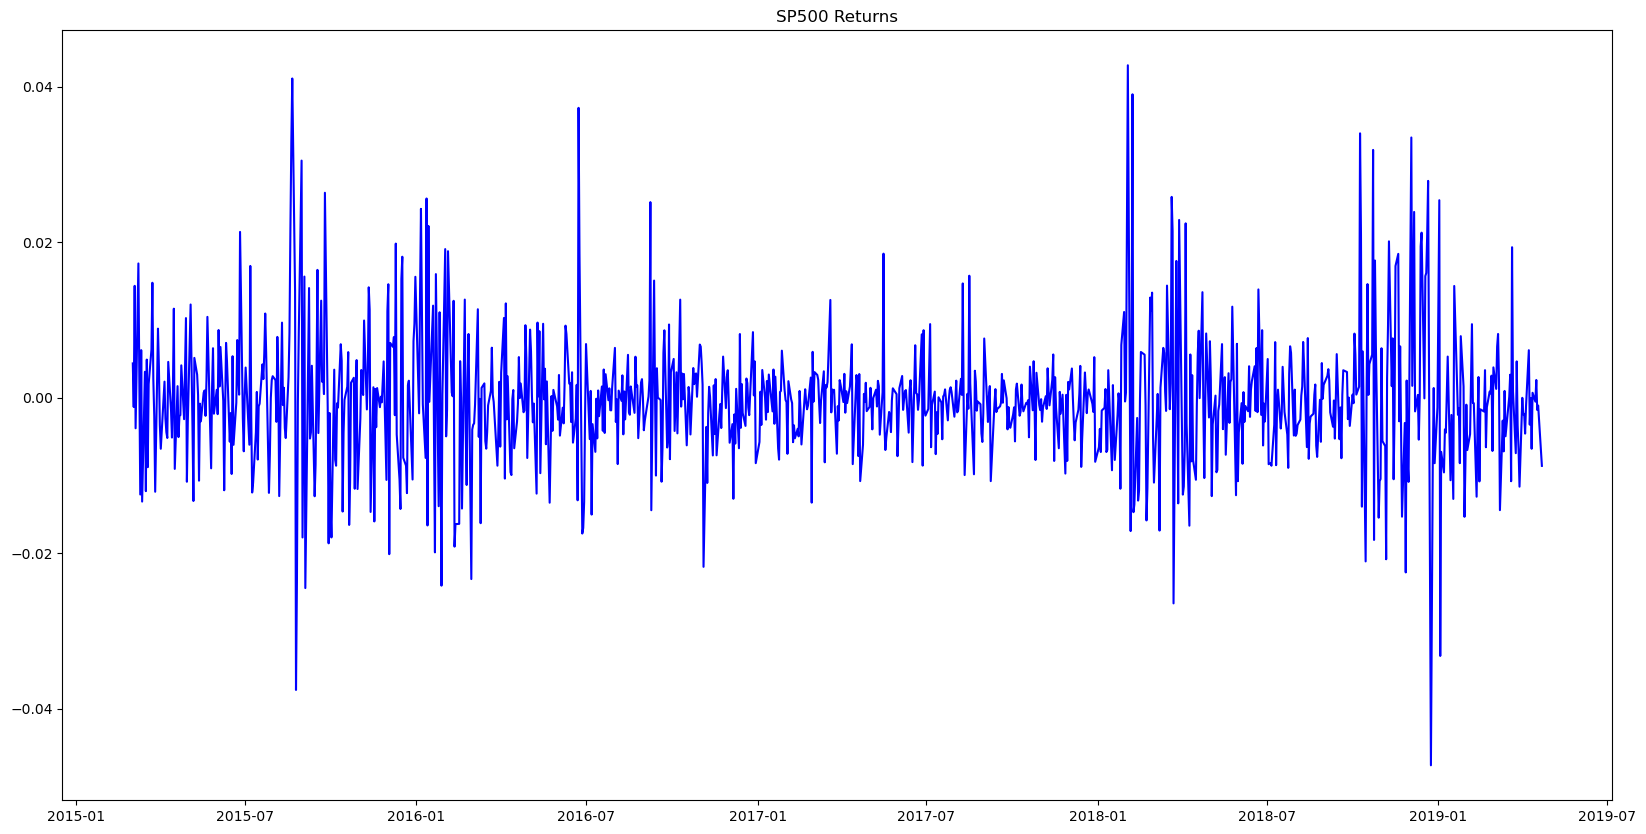

In [79]:
#Plot SP portfolio
combined_df['S&P 500'].plot(color='blue', figsize=(20, 10), title='SP500 Returns')

<Axes: title={'center': 'SOROS Returns'}>

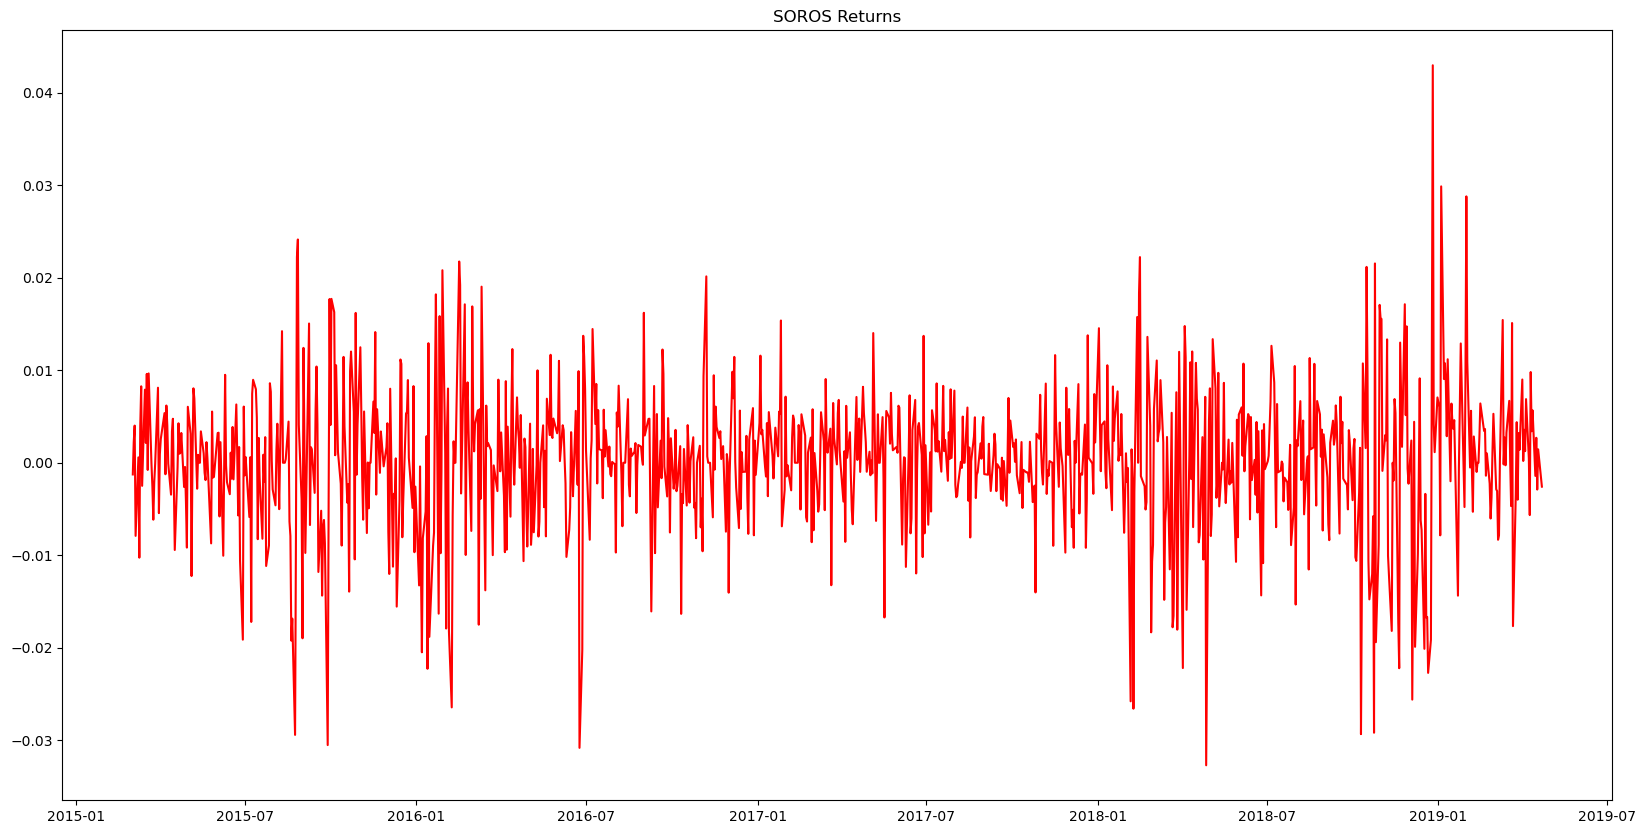

In [80]:
#Plot SOROS portfolio
combined_df['SOROS'].plot(color='red', figsize=(20, 10), title='SOROS Returns')

<Axes: title={'center': 'Paulson Returns'}>

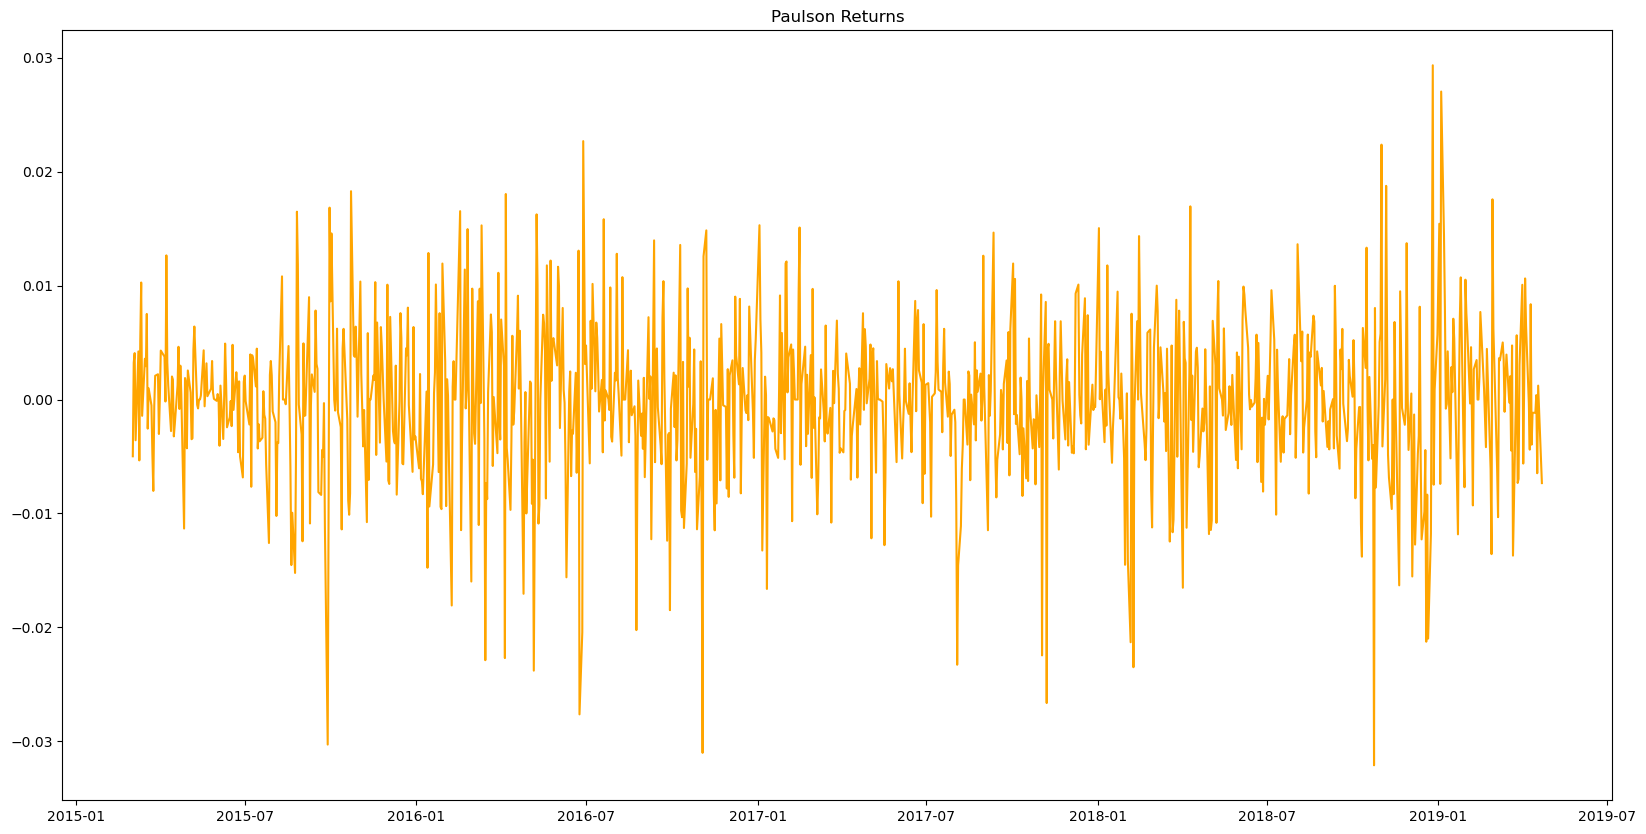

In [81]:
#Plot Paulson portfolio
combined_df['Paulson'].plot(color='orange', figsize=(20, 10), title='Paulson Returns')

<Axes: title={'center': 'Tiger Returns'}>

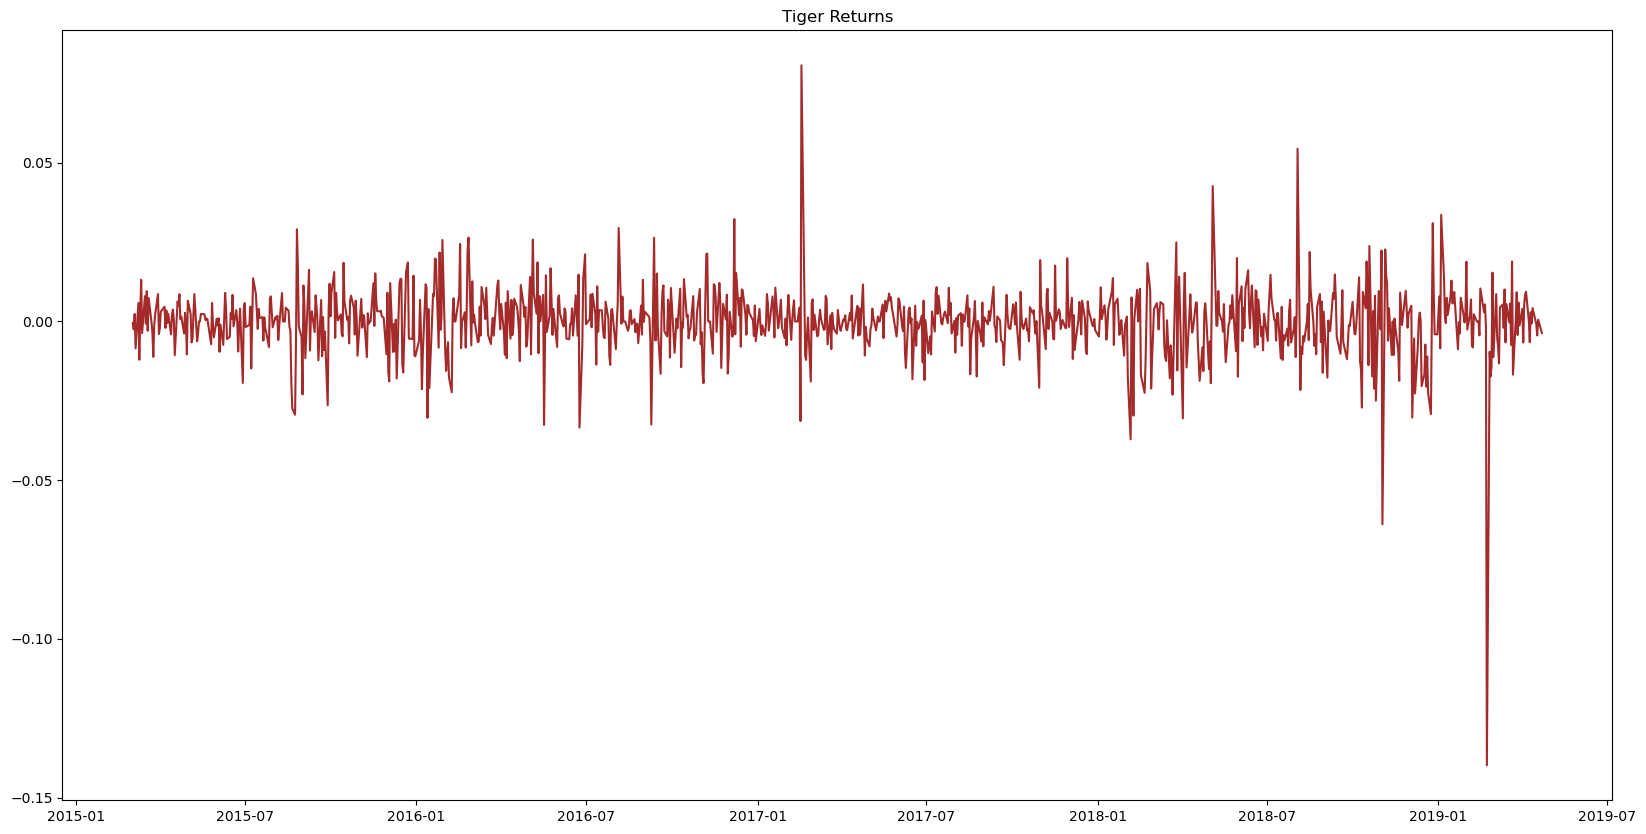

In [82]:
#Plot Tiger portfolio
combined_df['Tiger'].plot(color='brown', figsize=(20, 10), title='Tiger Returns')

<Axes: title={'center': 'BH Returns'}>

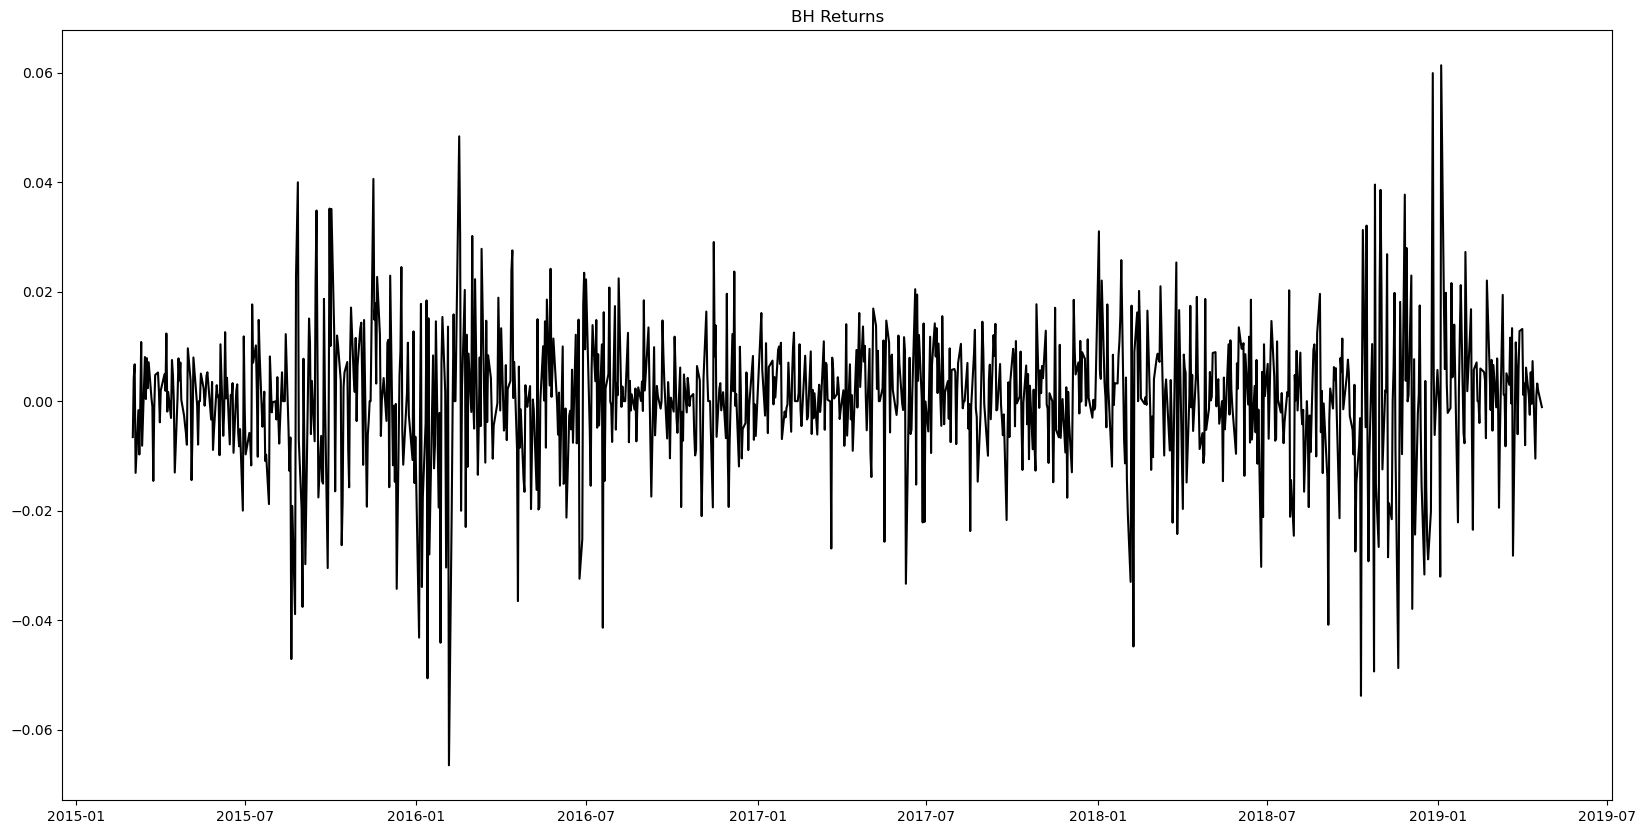

In [83]:
#Plot BH portfolio
combined_df['BH'].plot(color='black', figsize=(20, 10), title='BH Returns')

<Axes: title={'center': 'Algo 1 Returns'}>

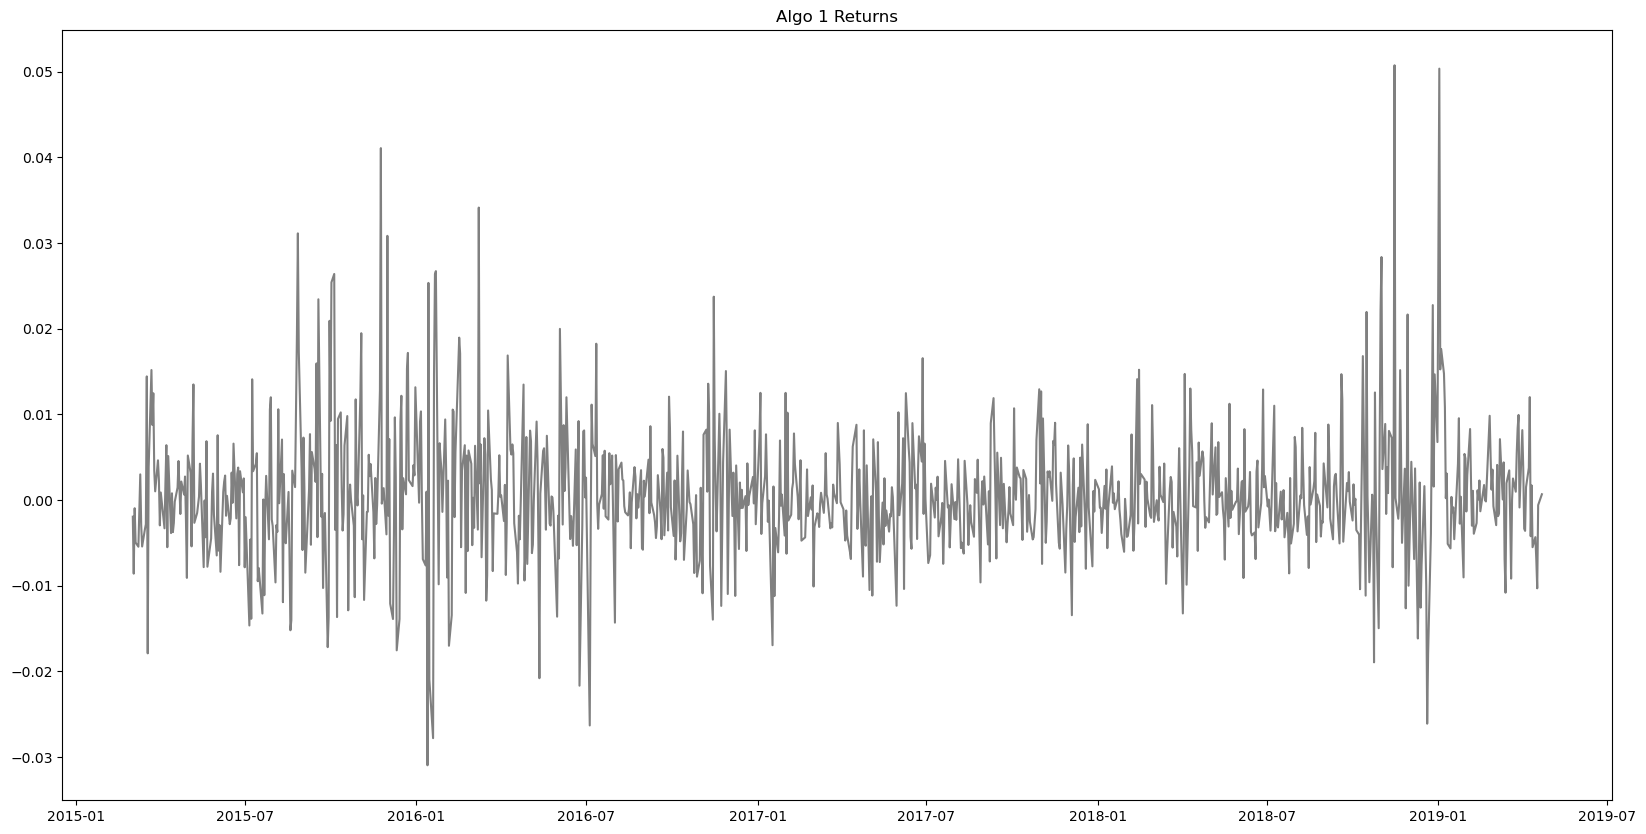

In [84]:
#Plot Algo 1 portfolio
combined_df['Algo 1'].plot(color='grey', figsize=(20, 10), title='Algo 1 Returns')

<Axes: title={'center': 'Algo 2 Returns'}>

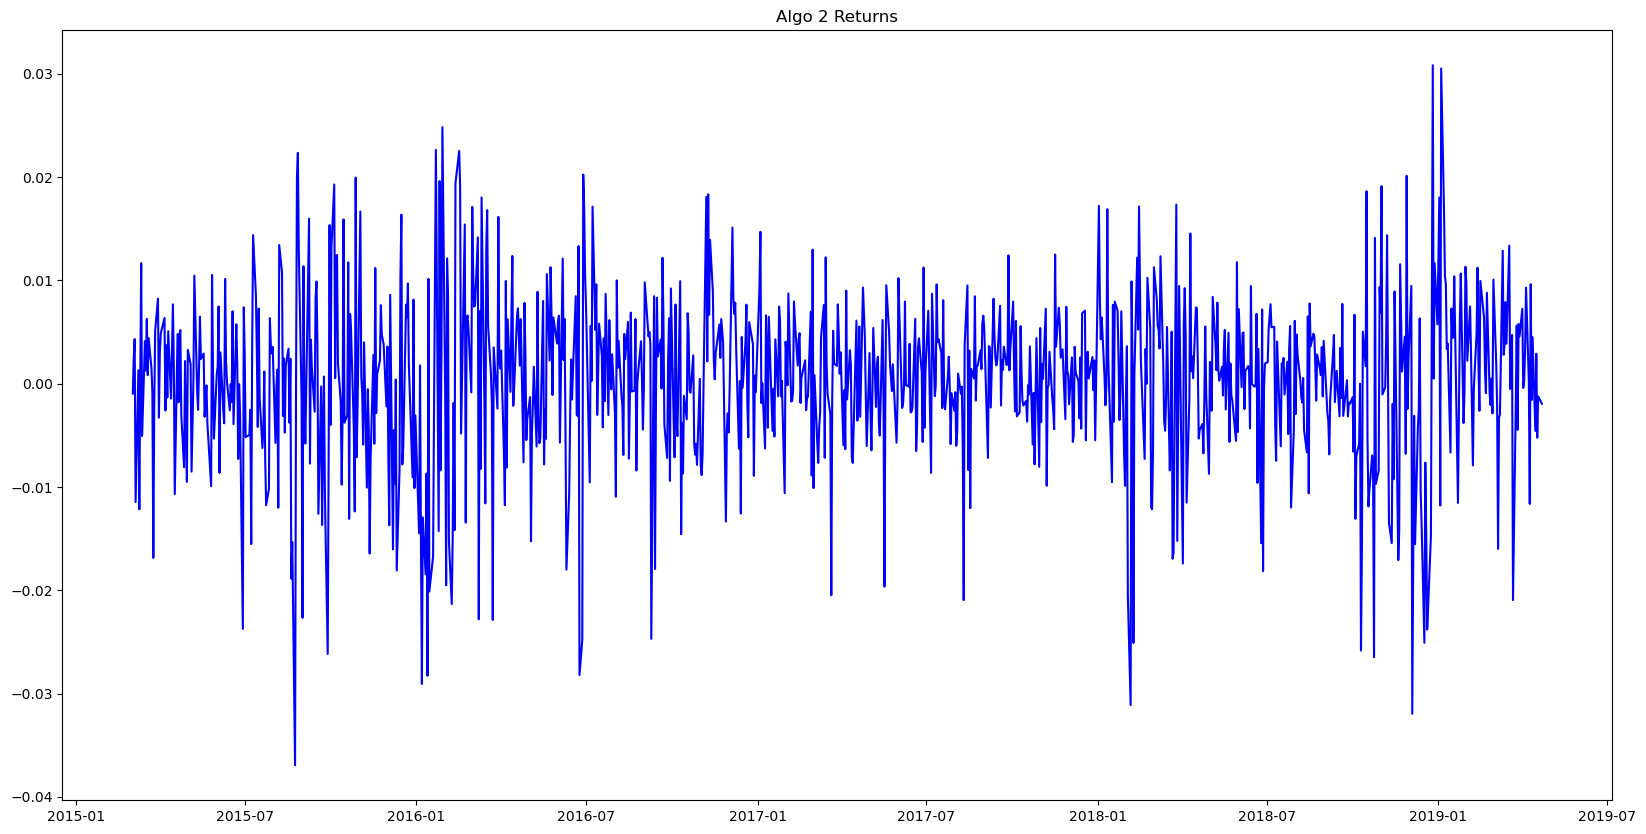

In [85]:
#Plot Algo 2 portfolio
combined_df['Algo 2'].plot(color='blue', figsize=(20, 10), title='Algo 2 Returns')

In [86]:
# Calculate std dev of all portfolios including My Portfolio
combined_df_std = combined_df.std()
combined_df_std.head()

SOROS      0.007897
Paulson    0.007027
Tiger      0.010897
BH         0.012924
Algo 1     0.007617
dtype: float64

In [87]:
combined_df_std.tail()

BH              0.012924
Algo 1          0.007617
Algo 2          0.008344
S&P 500         0.008591
My Portfolio    1.587087
dtype: float64

In [88]:
# My Portfolio, BH and Tiger are riskier than SP 500

In [89]:
# Calculate annual std dev of all portfolios including My Portfolio
combined_df_std_annual = combined_df.std() * np.sqrt(252)
combined_df_std_annual.head()

SOROS      0.125358
Paulson    0.111552
Tiger      0.172988
BH         0.205169
Algo 1     0.120915
dtype: float64

<Axes: >

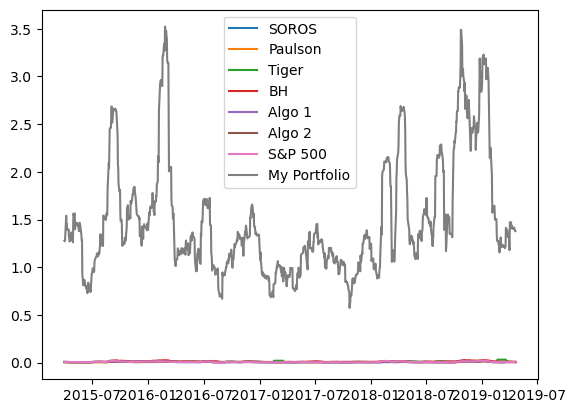

In [90]:
# Plot a rolling 21-day std dev of portfolio returns of all portfolios including My Portfolio
combined_df.rolling(window=21).std().plot()

In [91]:
# Use the `corr` function to calculate the correlation between all portfolio returns including My Portfolio
correlation = combined_df.corr()

<Axes: >

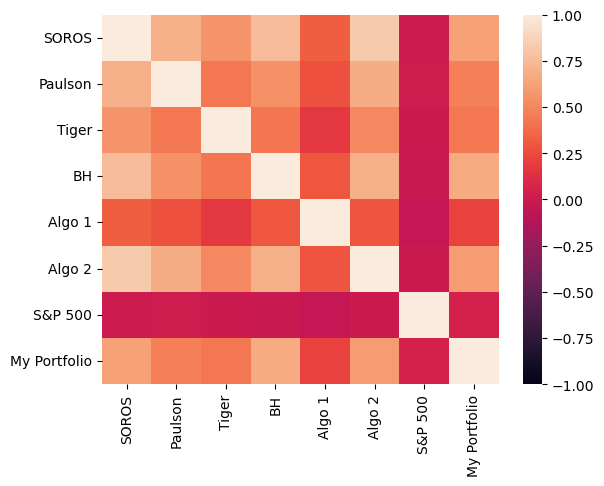

In [92]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1)

In [93]:
#No portfolio appears to strongly mimic the SP 500

In [94]:
# Calculate covariance of all daily returns of SOROS vs. S&P 500
covariance = combined_df['SOROS'].cov(combined_df['S&P 500'])
covariance

5.0000965320161385e-08

In [95]:
# Calculate variance of all daily returns of SOROS vs. S&P 500
variance = combined_df['S&P 500'].var()
variance

7.380314932730434e-05

In [96]:
# Calculate beta of all daily returns of SOROS
soros_beta = covariance / variance
soros_beta

0.0006774909441657518

<Axes: title={'center': 'Rolling 21-Day Beta of SOROS portfolio'}>

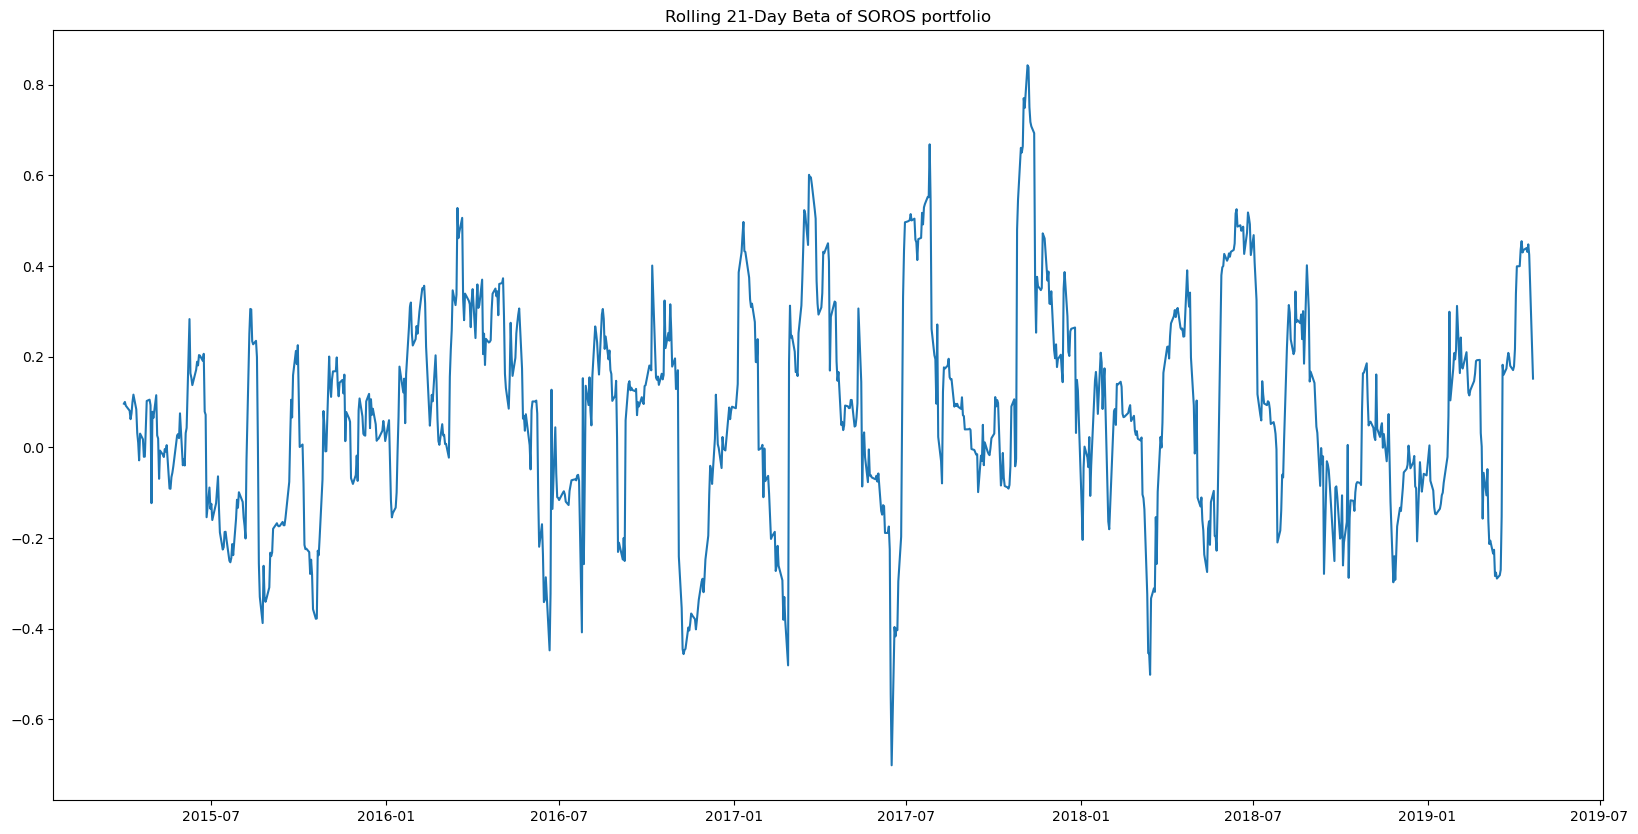

In [97]:
# Calculate 21-day rolling covariance of SOROS vs. S&P 500 
rolling_covariance = combined_df['SOROS'].rolling(window=21).cov(combined_df['S&P 500'])

# Calculate 21-day rolling variance of SOROS vs. S&P 500 
rolling_variance = combined_df['S&P 500'].rolling(window=21).var()

# Calculate 21-day rolling beta of SOROS and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of SOROS portfolio')


In [98]:
# Calculate Sharpe Ratio of all portfolios including My Portfolio
sharpe_ratios = (combined_df.mean() * 252) / (combined_df_std * np.sqrt(252))
sharpe_ratios.head()

SOROS      0.356856
Paulson   -0.480308
Tiger     -0.114819
BH         0.610843
Algo 1     1.346190
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

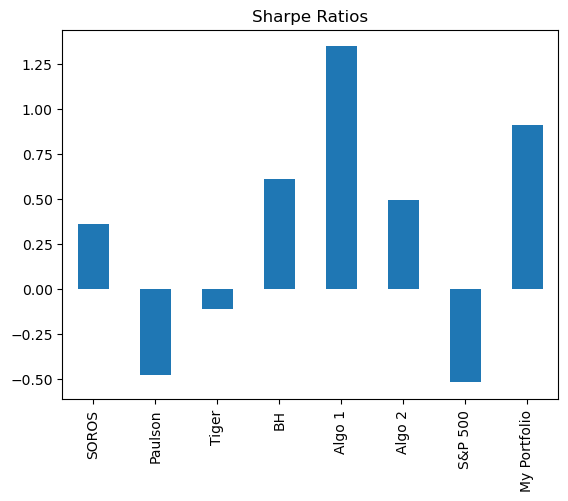

In [99]:
# Plot Sharp ratio
sharpe_ratios.plot.bar(title='Sharpe Ratios')

In [100]:
# Algo 1 outperforms both whales and SP500, Algo 2 outperforms all except BH
# My portfolio outperforms all portfolios except for Algo 1